__<center>3º Deliverable: Machine Learning</center>__

__<center>Life insurance policy</center>__

<div>
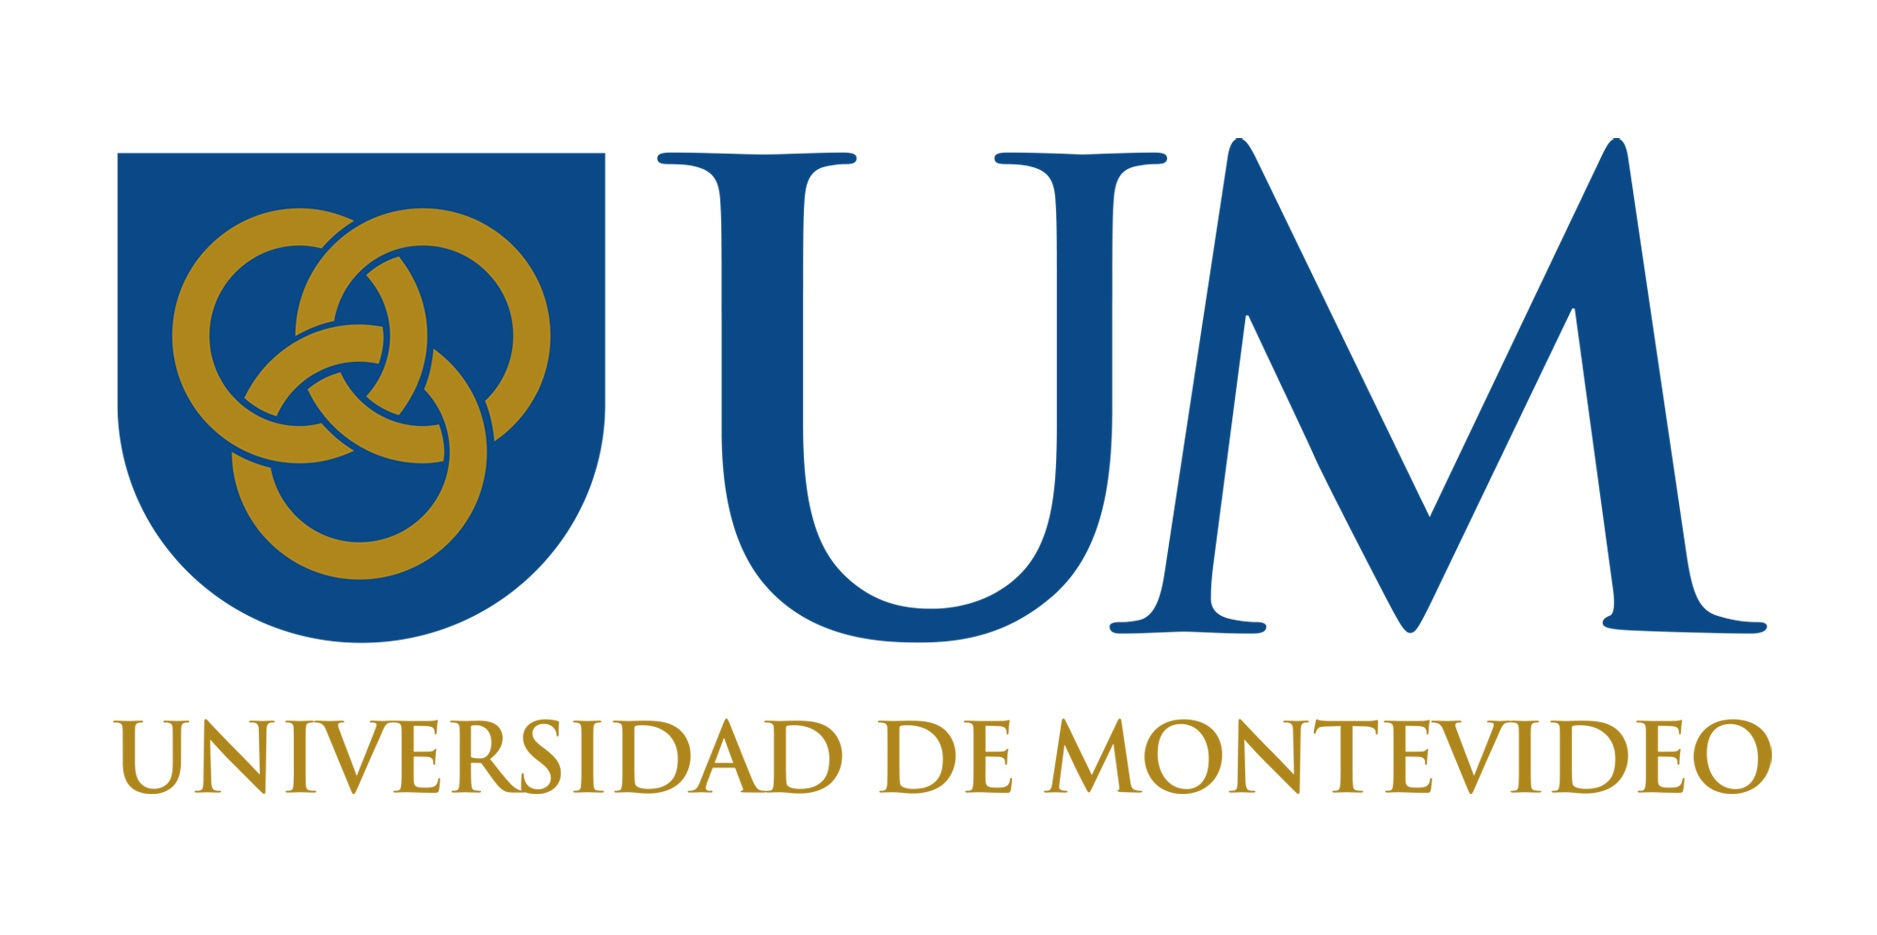
</div>


<center>Team VIII: Ariel Mordetzki and Mateo Stipaničić</center>
<center>Prof. Sebastián García Parra</center>
<center>November 2022</center>

___


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Outline" data-toc-modified-id="Outline-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Outline</a></span></li><li><span><a href="#Registration-form" data-toc-modified-id="Registration-form-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Registration form</a></span><ul class="toc-item"><li><span><a href="#Synthetic-dataset-creation" data-toc-modified-id="Synthetic-dataset-creation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Synthetic dataset creation</a></span></li><li><span><a href="#Clustering-model" data-toc-modified-id="Clustering-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Clustering model</a></span></li><li><span><a href="#Classification-model" data-toc-modified-id="Classification-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Classification model</a></span></li></ul></li><li><span><a href="#Clinical-records-information" data-toc-modified-id="Clinical-records-information-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clinical records information</a></span><ul class="toc-item"><li><span><a href="#Data-analysis-on-clinical-records-dataset" data-toc-modified-id="Data-analysis-on-clinical-records-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data analysis on clinical records dataset</a></span><ul class="toc-item"><li><span><a href="#Dataset-configuration" data-toc-modified-id="Dataset-configuration-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Dataset configuration</a></span></li><li><span><a href="#Data-cleaning-and-pre-processing" data-toc-modified-id="Data-cleaning-and-pre-processing-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Data cleaning and pre-processing</a></span></li><li><span><a href="#Dataset-discussion" data-toc-modified-id="Dataset-discussion-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Dataset discussion</a></span></li></ul></li><li><span><a href="#Key-clinical-variables" data-toc-modified-id="Key-clinical-variables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Key clinical variables</a></span><ul class="toc-item"><li><span><a href="#Decision-tree-for-key-variables" data-toc-modified-id="Decision-tree-for-key-variables-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Decision tree for key variables</a></span></li><li><span><a href="#Random-forest-for-key-variables" data-toc-modified-id="Random-forest-for-key-variables-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Random forest for key variables</a></span></li><li><span><a href="#Key-variables-discussion" data-toc-modified-id="Key-variables-discussion-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Key variables discussion</a></span></li></ul></li><li><span><a href="#Classification-model-on-clinical-dataset" data-toc-modified-id="Classification-model-on-clinical-dataset-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Classification model on clinical dataset</a></span><ul class="toc-item"><li><span><a href="#Decision-tree-and-random-forest" data-toc-modified-id="Decision-tree-and-random-forest-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Decision tree and random forest</a></span></li><li><span><a href="#More-classification-methods" data-toc-modified-id="More-classification-methods-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>More classification methods</a></span><ul class="toc-item"><li><span><a href="#SVM" data-toc-modified-id="SVM-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.3.2.2"><span class="toc-item-num">3.3.2.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#k-NN" data-toc-modified-id="k-NN-3.3.2.3"><span class="toc-item-num">3.3.2.3&nbsp;&nbsp;</span>k-NN</a></span></li><li><span><a href="#Perceptron" data-toc-modified-id="Perceptron-3.3.2.4"><span class="toc-item-num">3.3.2.4&nbsp;&nbsp;</span>Perceptron</a></span></li></ul></li><li><span><a href="#Classification-models-discussion" data-toc-modified-id="Classification-models-discussion-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Classification models discussion</a></span></li></ul></li></ul></li></ul></div>



___

# Outline

The following is a commented code in Python that corresponds to the third task in Universidad de Montevideo's Machine Learning course. 

> __Context__ A life insurance carrier is wondering whether revenue could be increased, given the fact that, apparently, they have wrongly denied insurances to some clients.

> __Objectives__  The scope is dual: _(1)_ create a model that predicts whether additional information such as clinical records should be asked to an incoming client and _(2)_ create a model that identifies whether those given records signify a heart failure threat. The first one can be, too, divided in two: _(1.1)_ from the universe of past people who have asked a life insurance, what's the sub-group that should have been asked further information, instead of rejecting them and _(1.2)_ ponder if an incoming client belongs to such sub-group.

> __Problem definition__ Question _(1.1)_ is modelled as a clustering problem due to the lack of target labels <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1); _(1.2)_ as a classification problem with the former problem's clusters as classes; _(2)_ as a classification problem as well. 

> __Method__ k-means is used as clustering model for _(1.1)_, whereas a decision tree is implemented in _(1.2)_ and a random forest for _(2)_. Nevertheless, methods are susceptible to change given model results.

> __Metrics__ It is assumed that it is preferable to ask an incoming client his clinical records when it was not needed, and then correctly classify him as dangerous or not (in this way, there are two barriers to be skipped). In other words, both in problem _(1)_ and _(2)_ we try to avoid as much ___false positives___ <a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-1) as possible (no incoming client with high risk of heart failure should be welcomed) but simultaneously, prevent the loss of clients, so in problem _(2)_,  there is also a vested interest in lowering false negatives as well: ___accuracy___ can reflect this. The reasoning of this logic resides on the fact that a false negative means an operational cost, whereas a false positive implies "just" an opportunity cost (although it is true that these opportunity costs are the ones being searched for).


_Notes:_

<a name="cite_note-1"></a> [1](#cite_ref-1) The past data on whether the client was accepted or not could be interpreted as a label, or even heart failure history. However, we understand that if the insurance carrier is attempting to renew its client policy, it is only fair to construct the new labelling from the client universe's proper patterns, and not from the same policy that is wished to change.

<a name="cite_note-2"></a> [2](#cite_ref-2) Positive meaning no clinical record request or no heart failure risk, implying a "good" client (a false positive is thus someone who was labelled as a solid client, but in fact he was not). Instead, a false negative would be a client discarded that had no risk at all. The terms positive and negative could be interpreted conversely, but the idea is to strictly minimize the amount of clients at risk, and if possible, maximize healthy clients.

In [69]:
# Imports used in this Notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
from scipy import stats
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron


from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

___
# Registration form

> In this section, we will explore problems _(1.1)_ and _(1.2)_, meaning, the clustering and classification of answers in the registration form.

## Synthetic dataset creation

We found that scikit-learn has implemented a dataset generator, having as input the probability distributions of each feature. The attributes for each sample must be related to the questions in the registration form: 
- Weight (float) 
- Height (float)
- Number of sports practiced (int)
- Smoker (bool)
- Risky activity (bool)
- Hipertension (bool)
- Diseases (bool)
- Treatments (bool)

In [2]:
# Dataset creation
size = 1000
columns = ["weight", "height", "number_of_sports", "smoker", "risk_activity", "hipertension", "diseases", "treatements"]
weights = np.random.normal(75, 25, size) #in kg
heights = np.random.normal(170, 15, size) # in cm
n_of_sports = np.random.randint(0, 3,size )
smoker = np.random.randint(0, 1, size)
risk_activity = np.random.randint(0, 1, size)
hiper = np.random.randint(0, 1, size)
treatments = np.round_(np.random.exponential(scale=1.0, size = size))
diseases = np.round_(np.random.exponential(scale=1.0, size=size))


data = dict(zip(columns, [weights, heights, n_of_sports, smoker, risk_activity, hiper, diseases,treatments]))
df = pd.DataFrame(data)
df.head()

,weight,height,number_of_sports,smoker,risk_activity,hipertension,diseases,treatements
0,48.377406,183.892442,1,0,0,0,1.0,0.0
1,52.592083,166.074040,1,0,0,0,0.0,0.0
2,59.219613,158.361117,2,0,0,0,0.0,1.0
3,84.892679,188.385096,1,0,0,0,0.0,0.0
4,46.275972,163.168917,0,0,0,0,0.0,1.0


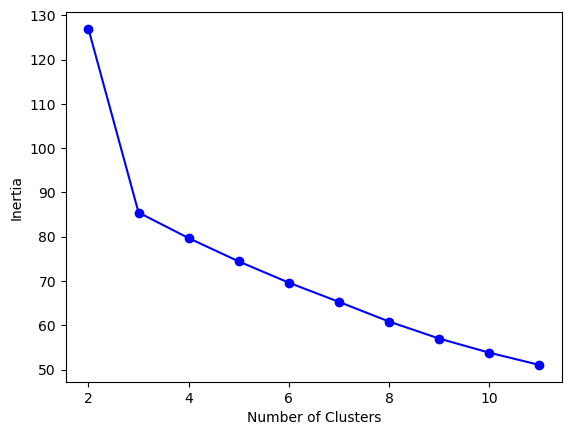

In [3]:
def elbowMethod(max_clusters, dataset):
    from sklearn.cluster import KMeans
    # Elbow method

    elbow_points = []
    #max_clusters = len(dataset_blood_scaled)
    n_clust = [i+2 for i in range(max_clusters)]

    for num in n_clust:
        kmeans = KMeans(n_clusters = num, random_state = 42)
        kmeans.fit(dataset)
        elbow_points.append(kmeans.inertia_)

    plt.plot(n_clust, elbow_points, 'bo-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()


max_clusters = 10

scaler = MinMaxScaler() 
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)


elbowMethod(max_clusters, df_scaled)

In [4]:
def nClusters(n, dataset):
    
    # DESCRIPTION: 
    # Function that clusterizes some dataset.
    
    # INPUTS:
    # n (int): Number of clusters
    # dataset (pd Dataframe): Clients dataset after a PCA for dimensionality reduction
    # modelType (str): string indicating the choice of model
    
    # OUTPUTS:
    # model (object): the sklearn model of kmeans already "trained", used for
    # obtaining information
    # dataset (pd dataframe): the fitted dataset
    # clusters_df (pandas dataframe): the input dataframe but with cluster id aggregated
    # assign (pandas dataframe): the original first dataframe with original features,
    # but with cluster id aggregated
    
    model = KMeans(n_clusters = n, random_state = 42) # max iters is set to 300 by default
    model.fit(dataset)

    # Assign a cluster id to the original df.
    clusters_df = pd.concat([dataset, pd.Series(model.labels_)], axis = 1) # concatenate labels to pca df
    clusters_df.columns = np.concatenate((dataset.columns.values, ['CLUSTER ID']), axis = 0) #add the "cluster id" columna
    #clusters_df = pd.concat([CUST_ID, clusters_df], axis = 1) #add the "customer id" df at the begining.
    print(f'The model assigned theese values:')
        
    # Recovering previous features for discussion:
    #assign = pd.concat([client_data, pd.Series(model.labels_)], axis = 1) # concatenate labels to pca df
    #assign.columns  = np.concatenate((client_data.columns.values, ['CLUSTER ID']), axis = 0) #add the "cluster id" columna
    print(clusters_df['CLUSTER ID'].value_counts())
        
    return clusters_df, model

n = 3

df_scaled_cluster, model = nClusters(n, df_scaled)

The model assigned theese values:
0    337
1    333
2    330
Name: CLUSTER ID, dtype: int64


In [5]:
df_scaled_cluster # esto esta mal, hay que asignar de vuelta las columnas
df['CLUSTER ID'] = df_scaled_cluster['CLUSTER ID'] #agrego los clusters id al df original SIN ESCALAR
df                                           

,weight,height,number_of_sports,smoker,risk_activity,hipertension,diseases,treatements,CLUSTER ID
0,48.377406,183.892442,1,0,0,0,1.0,0.0,2
1,52.592083,166.074040,1,0,0,0,0.0,0.0,2
2,59.219613,158.361117,2,0,0,0,0.0,1.0,1
3,84.892679,188.385096,1,0,0,0,0.0,0.0,2
4,46.275972,163.168917,0,0,0,0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
995,99.439004,172.512053,2,0,0,0,1.0,0.0,1
996,93.286728,173.761390,0,0,0,0,1.0,1.0,0
997,51.125313,197.974699,2,0,0,0,2.0,1.0,1
998,98.318330,173.984184,1,0,0,0,1.0,2.0,2


In [74]:
def plotNdimensions(n,n_clusters, dataset,model, model_type): 
    
    # DESCRIPTION:
    # Function that given a fitted dataset, plots the clustering result
    # in order to do this, we perform a PCA to reduce dimensionality.
    
    # INPUTS:
    # n (int): number of dimensions to plot (number of components of visualization PCA)
    # dataset (sklearn object): ALREADY fitted dataset of 6 components
    # model (sklearn object): model type, only used to get labels for plot
    # model_type (str): string indicating the model type,
    # only used for fancy automatic titles
    
    # OUTPUTS:
    # No outputs
    
    plt.rcParams['figure.figsize'] = [10, 7]
    
    # pca to lower dimension to n
    n_components = n
    pca_final = PCA(n_components = n_components)
    pca_final.fit(dataset)  
    
    # aux df for plotting
    visualization = pd.DataFrame(pca_final.fit_transform(dataset), columns = [str(i) for i in range(n)])
    visualization = pd.concat([visualization, pd.Series(model.labels_)], axis = 1) # add the labels
    visualization.columns = np.concatenate(([str(i+1) for i in range(n)],['CLUSTER ID']), axis = 0)   
    
    if n == 3:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        x = visualization['1'].values.astype(float)
        y = visualization['2'].values.astype(float)
        z = visualization['3'].values.astype(float)

        ax.scatter(x,y,z, c=visualization["CLUSTER ID"], s=40) #, cmap="RdBu")
        
        plt.title(f'3D visualization for: {n_clusters} clusters, using: {model_type} clustering')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_zticklabels([])
        
        ax.set_xlabel('PC1', fontweight ='bold')
        ax.set_ylabel('PC2', fontweight ='bold')
        ax.set_zlabel('PC3', fontweight ='bold')
      
        plt.show()
    
    elif n == 2:
        
        sns.scatterplot(x='1',y='2',hue='CLUSTER ID',legend='full',data=visualization).set(title=f'2D visualization for: {n_clusters} clusters, using: {model_type} clustering')

    else:
        print("The human brain can only interpret 2 or 3 dimensions")
        
        

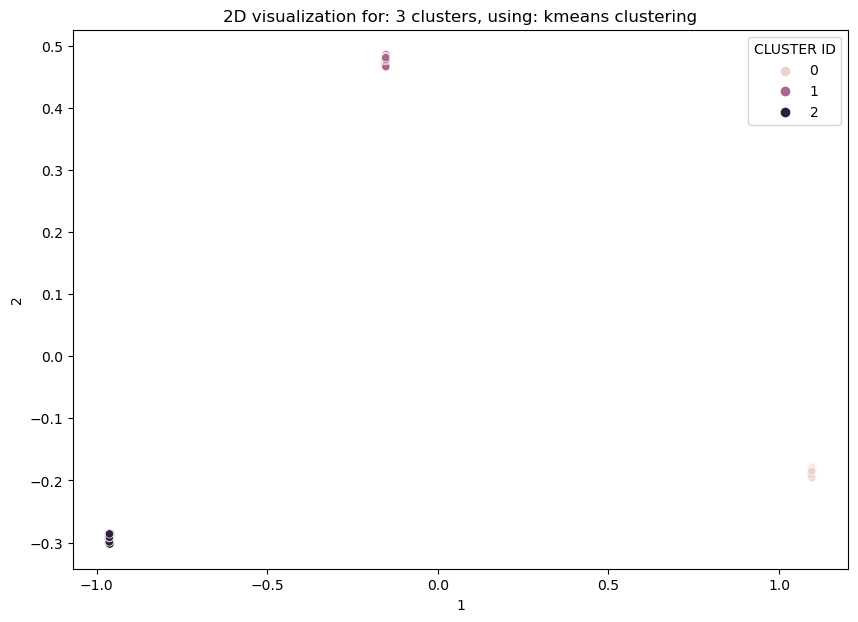

In [7]:
dimensions = 2
plotNdimensions(dimensions,n, df_scaled_cluster,model, 'kmeans')

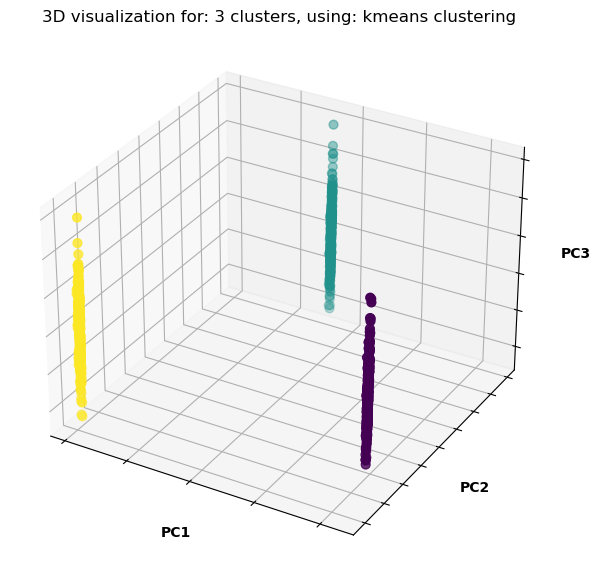

In [8]:
dimensions = 3
plotNdimensions(dimensions,n, df_scaled_cluster,model, 'kmeans')

In [9]:
def getMeansFromCluster(assigned_df, n_clusters):
    
    # DESCRIPTION:
    # Function that outputs statistics of dataset with assigned cluster id
    # after some clusterization
    
    # INPUTS:
    # assigned_df (pandas dataframe): dataframe containinng the original
    # features before pca and a cluster id
    # n_clusters (int): number of clusters 
    
    # OUTPUTS:
    # statistics (pandas dataframe): dataframe containing the mean of
    # every feature grouped by cluster
    
    # HAY QUE CAMBIAR ESTO
    #["weight", "height", "number of sports", "smoker", "risk activity", "hipertension", "diseases", "treatements"]
    
    weight = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).weight.mean())
    height= pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).height.mean())
    sports= pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).number_of_sports.mean())
    smoker = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).smoker.mean())
    risk_activity = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).risk_activity.mean())
    hipertension = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).hipertension.mean())
    diseases = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).diseases.mean())
    treatements = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).treatements.mean()) 
    

    statistics = pd.concat([pd.Series([i for i in range(n_clusters)]), weight,height, sports, smoker,risk_activity,hipertension,diseases,treatements], axis=1)
    statistics = statistics.rename(columns = {0:'CLUSTER ID'}) #correct the number of cluster id column
    return statistics


statistics = getMeansFromCluster(df, 3)
statistics

,CLUSTER ID,weight,height,number_of_sports,smoker,risk_activity,hipertension,diseases,treatements
0,0,75.543322,170.583813,0.0,0.0,0.0,0.0,1.050445,0.908012
1,1,74.494747,170.989307,2.0,0.0,0.0,0.0,0.993994,0.951952
2,2,73.905529,169.912204,1.0,0.0,0.0,0.0,1.048485,0.957576


In [10]:
# elegimos arbitrariamente el 0

df_to_further = df[df['CLUSTER ID'] == 0] # a estos les pedimos que se saquen sangre
df_to_further.head()

,weight,height,number_of_sports,smoker,risk_activity,hipertension,diseases,treatements,CLUSTER ID
4,46.275972,163.168917,0,0,0,0,0.0,1.0,0
5,77.625793,155.410473,0,0,0,0,2.0,1.0,0
9,87.921780,176.663782,0,0,0,0,1.0,0.0,0
12,99.227948,166.761802,0,0,0,0,1.0,4.0,0
15,72.453410,186.307153,0,0,0,0,0.0,1.0,0


In [11]:
print("cantidad de personas a las que les pedimos analisis extra: ",len(df_to_further))

cantidad de personas a las que les pedimos analisis extra:  337


## Clustering model

## Classification model

___
# Clinical records information

> We now turn into problem _(2)_, which aims to identify key patterns in a clinical records dataset as to create a predictive model over incoming clients' clinical information; the objective is to identify heart failure risk. __We perform both a decision tree and a random forest as to understand which health variables are to be asked; then, we make use of these decision tree and random forest as to perform the classification model with the help of other algorithms as well.__ 


## Data analysis on clinical records dataset

### Dataset configuration

In [12]:
# Dataset
dataset_blood = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Variable identification: dataset format with first sample bloodtests
dataset_blood.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


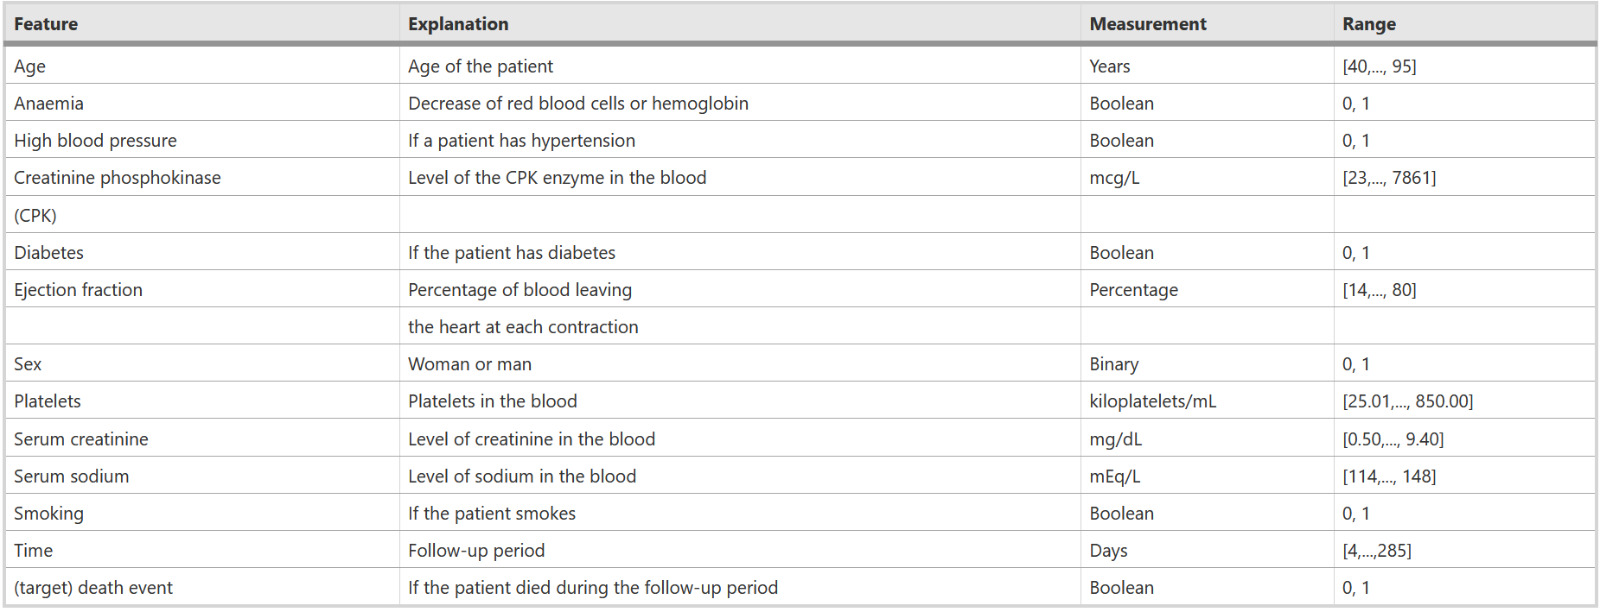

In [13]:
# Print dataset size
dataset_blood.shape

(299, 13)

In [14]:
# Data types and null counts
dataset_blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


It should be noted how non-null counts are all equal to the amount of samples in the dataset: there are no null values.

In [15]:
# Statistical properties
dataset_blood.describe(percentiles = [0.25, 0.50, 0.75, 0.95])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
95%,82.000000,1.000000,2263.000000,1.000000,60.000000,1.000000,422500.000000,3.00000,144.000000,1.000000,1.00000,250.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


This presentation of statistical properties indicates the need for outlier considerations: for example, the maximum value in _creatinine_phosphokinase_ is too high compared to the mean, the standard deviation and the 95% percentile. The same happens with _platelets_ and _serum_creatinine_.

   Count  Percentage
0    203       67.89
1     96       32.11


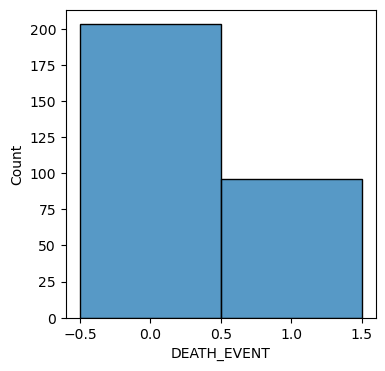

In [16]:
# Histogram of counts
fig, ax = plt.subplots(figsize=(4, 4))
sns.histplot(dataset_blood['DEATH_EVENT'], discrete=True)
print(pd.concat( [dataset_blood['DEATH_EVENT'].value_counts(),
                  dataset_blood['DEATH_EVENT'].value_counts(normalize=True).mul(100).round(2)],
                 axis = 1,
                 keys = ('Count', 'Percentage')))

We can observe that the dataset is highly unbalanced towards "no death event". Nevertheless, medical conditions such as heart failure cannot be expected to be balanced: it is as if we were looking into the diabetes feature and desire to have a balanced population of 50%-50%.

### Data cleaning and pre-processing

In [17]:
# Cleaning unwanted features
dataset_blood.drop('time', axis=1, inplace=True)
dataset_blood.shape

(299, 12)

Given a description of all variables, we understand that the feature _Time_ is not relevant for the analysis; we were not going to consider cases where follow-up period is either too short or too long, but dataset was drastically reduced and those extreme situations carried information (for example, short follow-ups coincided with death event, and viceversa).

In [18]:
# Confirmation on null counts
dataset_blood.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

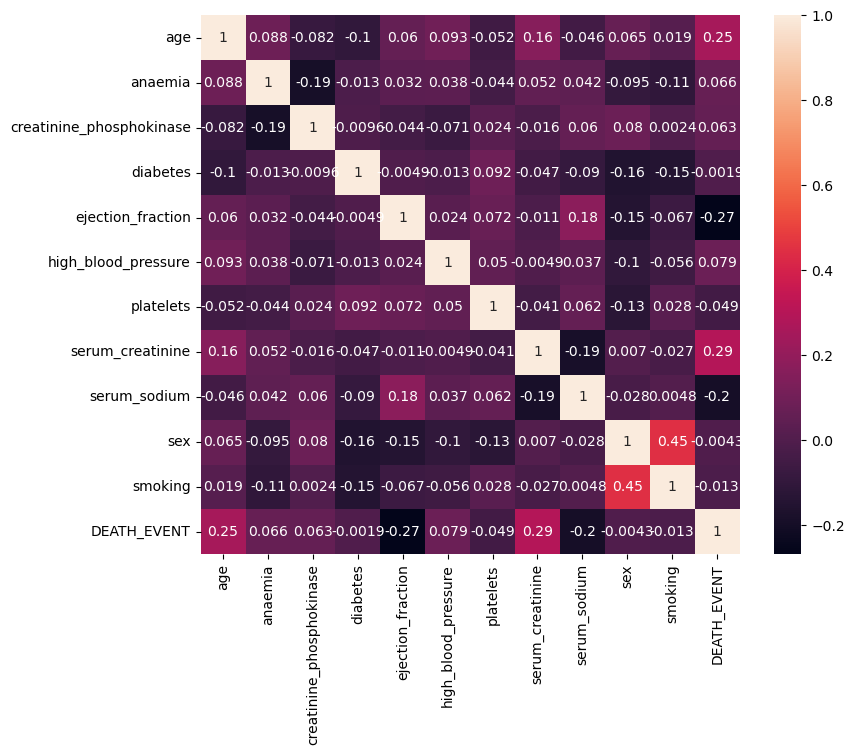

In [19]:
# Observing relationships between variables
f, ax = plt.subplots(figsize=(9, 7))
correlation = dataset_blood.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=bool), square=True, ax=ax, annot=True)
plt.show()

Variables do not seem to be highly correlated between each other: the maximum correlation, in absolute value, is 0.5. This suggests that the feature combinations do not overlap (each feature would add valuable information), possibly implying a low degree of reduction in explained variance in a PCA analysis.

Text(0, 0.5, 'Cumulative Explained Variance')

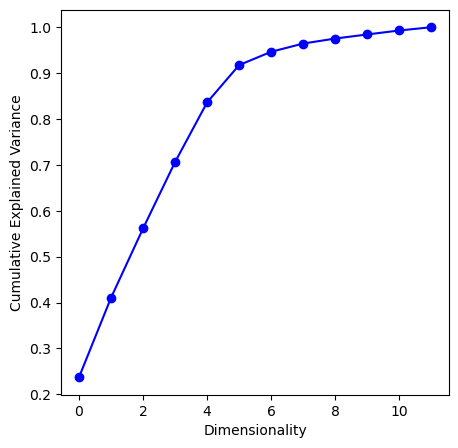

In [20]:
# Explained variance reducing dimensionality
scaler = MinMaxScaler() 
dataset_blood_scaled = pd.DataFrame(scaler.fit_transform(dataset_blood), columns = dataset_blood.columns)

pca = PCA()
pca.fit(dataset_blood_scaled)
figure_, ax = plt.subplots(figsize=(5, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Dimensionality')
plt.ylabel('Cumulative Explained Variance')

The assumption derived from the correlation matrix turned out to be rather untrue, given the fact that a 6-dimensional space would explain 95% of variance. This could be understood by the fact that the correlation matrix does not include correlation between combinations of variables. Nevertheless, __we will not perform PCA since we want to maintain the white-box nature of the modelling__ and maneuver variables with clinical sense.

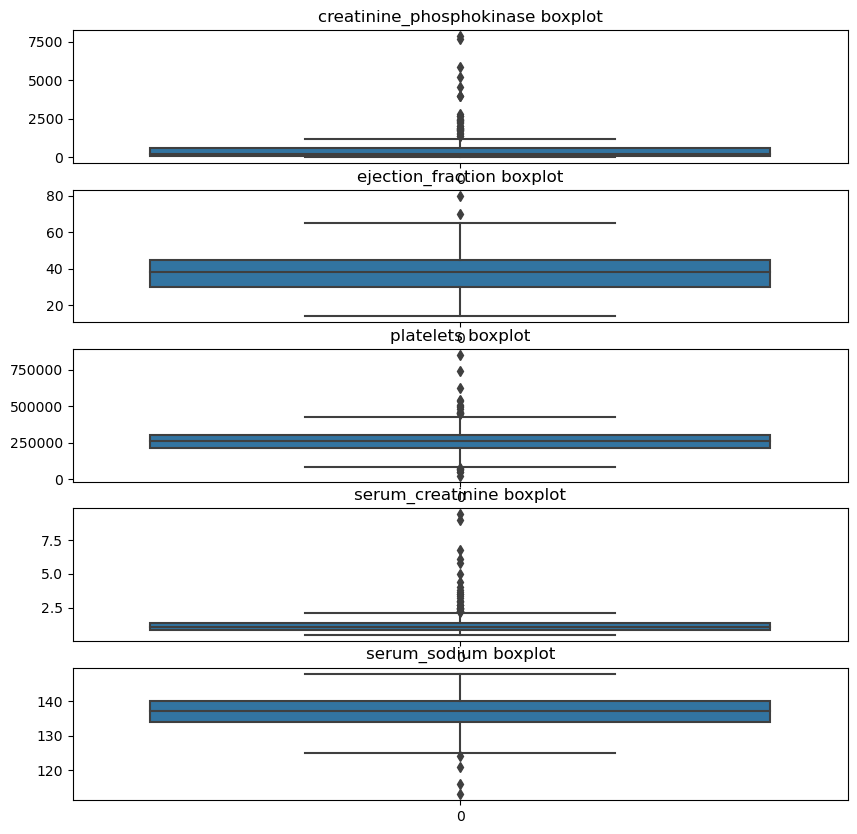

In [21]:
# Boxplots for outlier identification in relevant columns
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize = (10,10))
sns.boxplot(dataset_blood['creatinine_phosphokinase'], ax=ax1)
ax1.title.set_text('creatinine_phosphokinase boxplot')
sns.boxplot(dataset_blood['ejection_fraction'], ax=ax2)
ax2.title.set_text('ejection_fraction boxplot')
sns.boxplot(dataset_blood['platelets'], ax=ax3)
ax3.title.set_text('platelets boxplot')
sns.boxplot(dataset_blood['serum_creatinine'], ax=ax4)
ax4.title.set_text('serum_creatinine boxplot')
sns.boxplot(dataset_blood['serum_sodium'], ax=ax5)
ax5.title.set_text('serum_sodium boxplot')
warnings.filterwarnings("ignore", category=FutureWarning)

In [22]:
# Outlier considerations
dataset_blood = dataset_blood[(np.abs(stats.zscore(dataset_blood)) < 3).all(axis=1)]
dataset_blood.shape

(280, 12)

We search for outliers in columns that seem relevant when looking at the dataframe.describe() method. We can observe the high degree of outliers; thus, we take a brute force approach (instead of finger-picking outliers), and take out outliers with the traditional definition of samples 3 or more times the standard deviations far from the mean.

### Dataset discussion

In order to analyze the dataset's properties, we will frame the discussion into categories:
- __Volume:__ Interestingly enough, one would think that more data is available for such a relevant topic. However, it is understood that 
- __Velocity:__ This aspect is not of interest in this deliverable (we are __not__ getting data faster than we can process it).
- __Variety:__ The high degree of outliers can in fact be proof of the varied nature of the dataset.
- __Veracity:__ Lack of null values and lack of incoherent data samples makes a good case for this dataset's veracity.
- __Value:__ The business value of the dataset is framed in the insurance client policy system, although its scope reaches far from this application only.

## Key clinical variables

> We will now try to identify the most important features that determine the risk of heart failure by implementing both a decision tree and a random forest, and comparing feature importance in each case.

Since the exploration of the most important clinical variables is a different problem to the future classification mode, we consider that it is fair to treat them separately and perform a train/test split for each one. We thought of "recycling" decision trees and random forests that will be produced in this section for the following one: instead, we need to clarify that this usage of trees and forests is more a ___semi-supervised learning___ instance (_as a dataset comprehension mechanism_), whereas the classification model's usage of trees and forest is definetely a __supervised learning__ context. The nature of the problems are different; thus again, we treat them separately.

In [23]:
# Trees and forests require scaled dataset given the use of Euclidean distance
scaler = MinMaxScaler() 
dataset_blood_scaled = pd.DataFrame(scaler.fit_transform(dataset_blood), columns = dataset_blood.columns)

In [24]:
# Train and test split for the analysis of key clinical variables
X_key = dataset_blood_scaled.loc[:,dataset_blood_scaled.columns != 'DEATH_EVENT'] # features
y_key = dataset_blood_scaled ['DEATH_EVENT'] # target variable

X_train_key, X_test_key, y_train_key, y_test_key = train_test_split(X_key, y_key, stratify = y_key, random_state = 42) # stratify on y

In [25]:
# Function to plot important features in a tree/forest model
def plot_feature_importances(model, figure):

    n_features = len(X_key.columns) # number of features
    plt.figure(figsize=(5,5))
    plt.barh(range(n_features), model.feature_importances_, align='center') # check documentation on model
    plt.yticks(np.arange(n_features), X_key,size=10)
    plt.xticks(size=8)
    plt.xlabel('Feature importance',size=10)
    plt.ylabel('Features',size=10)
    plt.ylim(-1, n_features)
    sns.despine(top=True)
    plt.title(f'{figure}',size=10)
    plt.tight_layout()

### Decision tree for key variables

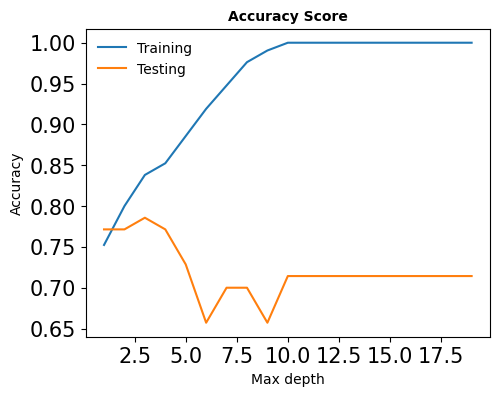

In [26]:
# Plot accuracy score for different tree depths
max_depth=range(1,20)
training_accuracy_key = [] 
test_accuracy_key = []

for depth in max_depth : 

    tree_depth = DecisionTreeClassifier(random_state=42, max_depth=depth, min_samples_leaf=1).fit(X_train_key, y_train_key)

    y_train_pred_key = tree_depth.predict(X_train_key)
    y_pred_key = tree_depth.predict(X_test_key)

    training_accuracy_key.append(accuracy_score(y_train_key,y_train_pred_key))
    test_accuracy_key.append(accuracy_score(y_test_key, y_pred_key))

fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(max_depth, training_accuracy_key, label='Training accuracy')
plt.plot(max_depth, test_accuracy_key, label='Test accuracy')
plt.ylabel('Accuracy',size=10)
plt.xlabel('Max depth',size=10)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Accuracy Score',size=10, weight='bold')
plt.legend(['Training','Testing'],frameon=False)
plt.show()    

As expected, the accuracy of training quickly tends to $1$ as the max depth increases. This is due to the very definition of overfitting a tree. We see a maximum of accuracy on training to max depth = 3

Furthermore, because there is a small amount of data samples, the tree quickly tends towards overfitting. This is evidenced by the sudden rise of the training accuracy, and the drop on the testing accuracy.

In [27]:
# Decision Tree implementation
tree_key = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, random_state=42).fit(X_train_key, y_train_key)
y_pred_key = tree_key.predict(X_test_key)
tree_accuracy_key = accuracy_score(y_pred_key, y_test_key)

print("Accuracy on test: {:.3f}".format(tree_accuracy_key))

Accuracy on test: 0.786


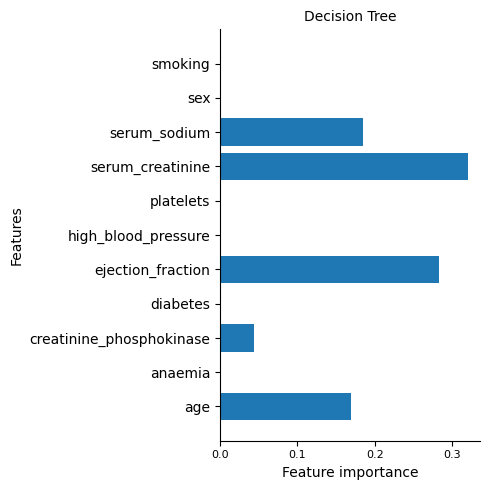

In [28]:
plot_feature_importances(tree_key,'Decision Tree')

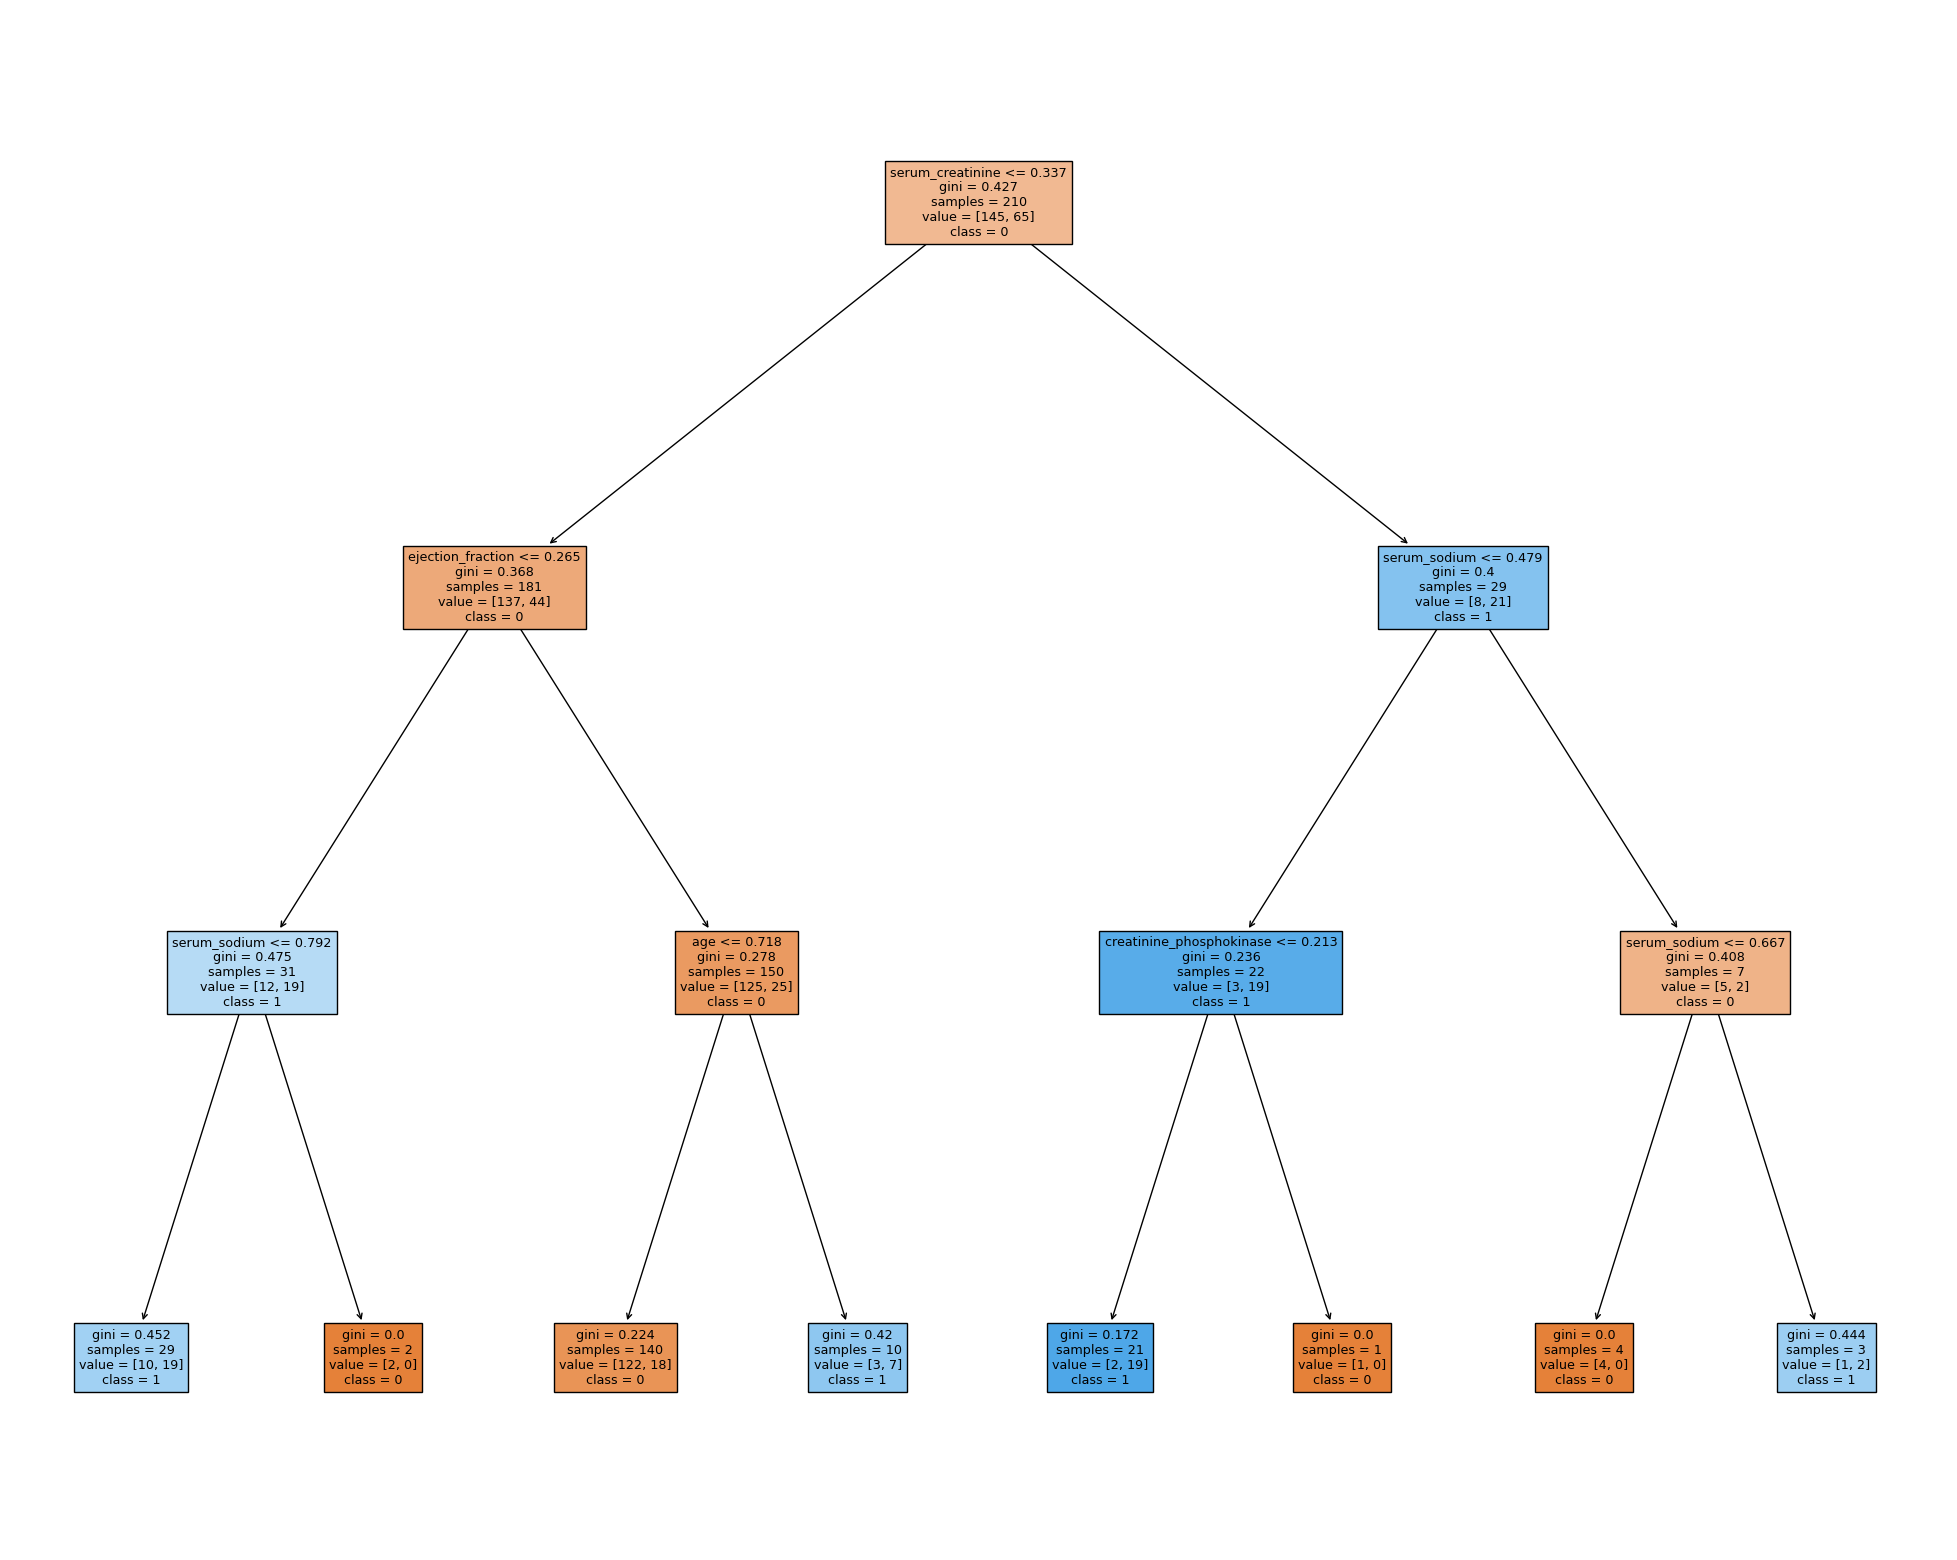

In [31]:
# Visualize tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree_key, feature_names=X_train_key.columns,  class_names=['0', '1'],filled=True)
plt.show()

The most important feature coincides with the first tree separator.

We shall repeat this process using random forest, in order to analyze more extensively and compare results: a decision tree can be biased to "over-ponder" the importance of a given feature. A random forest would cancel the bias of many trees to over-ponder or under-ponder certain features.

### Random forest for key variables


In [32]:
rf_key = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_key, y_train_key)
y_pred_key = rf_key.predict(X_test_key)
forest_accuracy = accuracy_score(y_pred_key, y_test_key)

print("Accuracy on test: {:.3f}".format(forest_accuracy))

Accuracy on test: 0.743


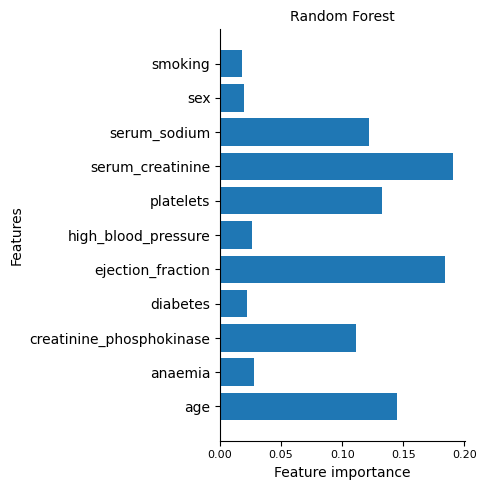

In [33]:
plot_feature_importances(rf_key, 'Random Forest')

### Key variables discussion

In [34]:
def variable_stats(var, dataset, axis):
    sns.histplot(data = dataset, x = var, ax=axis)
    plt.xlabel(var)

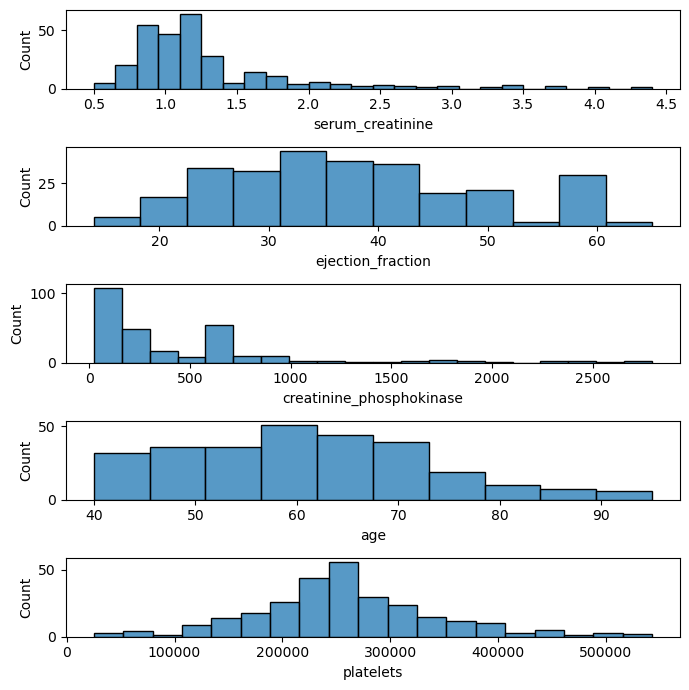

In [35]:
# Distributions of key features
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize = (7,7))
variable_stats('serum_creatinine', dataset_blood, ax1)
variable_stats('ejection_fraction', dataset_blood, ax2)
variable_stats('creatinine_phosphokinase', dataset_blood, ax3)
variable_stats('age', dataset_blood, ax4)
variable_stats('platelets', dataset_blood, ax5)
warnings.filterwarnings("ignore", category=FutureWarning)
plt.tight_layout()

Both models give similar results on feature importance, but as expected, random forest gives more insight into new features. Accuracy prints are to understand the scope of these results and to verify correct model hyper-parameters in the case of the decision tree.

As we can see, the most important features, ordered, are:
> * serum_creatinine
> * ejection_fraction
> * age
> * creatinine_phosphokinase, platelets and serum_sodium

It should be noted that these results are coherent with those found at the paper: see https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/7.

Further exploration on this topic could be the implementation of a p-values test (Pearson correlation); the research paper also takes this into account. However, we are satisfied with this approach: the main two features coincide with the researchers.

## Classification model on clinical dataset

> In this section, we will explore the implementation of a predictive model on heart failure risk. We will run various models; new decision tree and random forest, as well as other models. This approach is based on the fact that we are dealing with a reduced dataset and the implementation of different algorithms can help cope with this situation.

In [52]:
# Train and test split for the classification models
X = dataset_blood_scaled.loc[:,dataset_blood_scaled.columns != 'DEATH_EVENT'] # features
y = dataset_blood_scaled ['DEATH_EVENT'] # target variable

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, stratify = y, random_state = 58) # stratify on y

### Decision tree and random forest
Both a decision tree and a random forest were implemented as to identify key clinical features. We will remember these results.

In [53]:
# New Decision Tree implementation
tree_class = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, random_state=42).fit(X_train_class, y_train_class)
y_pred_class = tree_class.predict(X_test_class)
tree_accuracy = accuracy_score(y_pred_class, y_test_class)

print("Accuracy on test: {:.3f}".format(tree_accuracy))

Accuracy on test: 0.757


Logically, the decision tree implemented here is very similar in terms of accuracy to the one implemented for identifying key clinical variables.

In [54]:
rf_class = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_class, y_train_class)
y_pred_class = rf_class.predict(X_test_class)
forest_accuracy = accuracy_score(y_pred_class, y_test_class)

print("Accuracy on test: {:.3f}".format(forest_accuracy))

Accuracy on test: 0.714


Although these metrics are not so bad, trees and forests as classification models suffer from the reduced dataset size and dimensionality problems. The risk of overfitting is very present. Thus, we turn to new models.

It is useful to recall from the data analysis on clinical dataset that the best number of features to retain 90% of explained variance is 6. We will perform a PCA for these new models and try to gain a different perspective.

### More classification methods

We __need__ new models. Thus, we make a new split, and implement various different algorithms.

In [55]:
# Preparation for new models
n_components = 6
pca_final = PCA(n_components = n_components)
pca_final.fit(dataset_blood_scaled)
dataset_blood_scaled_pca = pd.DataFrame(pca_final.fit_transform(dataset_blood_scaled), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
dataset_blood_scaled_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.184563,0.416232,1.030226,0.000789,-0.404659,-0.490337
1,-0.976758,0.110683,0.372709,0.463197,-0.526557,0.314946
2,-0.141566,0.764763,-0.240307,0.529194,-0.530012,-0.368094
3,-0.526939,1.163529,0.526293,0.294178,0.324487,0.232412
4,-0.150815,0.811918,-0.211740,0.558779,-0.546306,-0.397233


In [56]:
# PCA requires new train-test split
y_pca = dataset_blood['DEATH_EVENT'] 
X_pca =  dataset_blood_scaled_pca 
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, train_size=0.8, test_size=0.2, random_state=36)

#### SVM

While performing an SVM, the main disadvantage is losing the white-box nature of the problem configuration (the business could not explain to a client our policy criteria). 

In [57]:
# Used for obtaining optimal parameters
hyper_params =  {'gamma': [0.01, 0.001,0.0001],'C': [1, 10, 100]}

# Create object model
SVM_model = SVC(kernel="linear")

# Create grid-search object and input model and dictionary of parameters
grid_search = GridSearchCV(estimator = SVM_model, param_grid = hyper_params)

# Perform grid-search
t_grid1 = time.perf_counter()
print("tuning hiper-params...")
grid_search.fit(X_train_pca, y_train_pca)
t_grid2 = time.perf_counter()
print(f'Grid-search took: {t_grid2-t_grid1} seconds')

# Recovering best hyper-parameters and score for SVM
best_hyperparams = grid_search.best_params_ 
best_score = grid_search.best_score_ 

print(f'Best hiper-params are: {best_hyperparams} with score: {best_score}')

tuning hiper-params...
Grid-search took: 0.35140609999996286 seconds
Best hiper-params are: {'C': 1, 'gamma': 0.01} with score: 1.0


In [61]:
# Create model with best SVM hiper-params
SVM_best_model = SVC(C=1, gamma=0.01, kernel="linear")
t1 = time.perf_counter()
SVM_best_model.fit(X_train_pca, y_train_pca)
t2 = time.perf_counter()
print(f'Training took: {t2-t1} seconds',  "\n")

prediction_SVM = SVM_best_model.predict(X_test_pca)
print("Testing Accuracy", metrics.accuracy_score(y_test_pca, prediction_SVM), "\n")

Training took: 0.006838399999992362 seconds 

Testing Accuracy 1.0 



This result is obviously surprising: the SVM best fit adapts both perfectly to the testing and to the training samples. We will keep exploring this by running new models.

#### Logistic Regression

In [62]:
logreg = LogisticRegression(solver='newton-cg').fit(X_train_pca, y_train_pca) #keeping C=1 a
y_train_pred = logreg.predict(X_train_pca)
y_pred_log_reg = logreg.predict(X_test_pca)

print("Testing Accuracy", metrics.accuracy_score(y_test_pca, y_pred_log_reg), "\n")

Testing Accuracy 1.0 



#### k-NN 

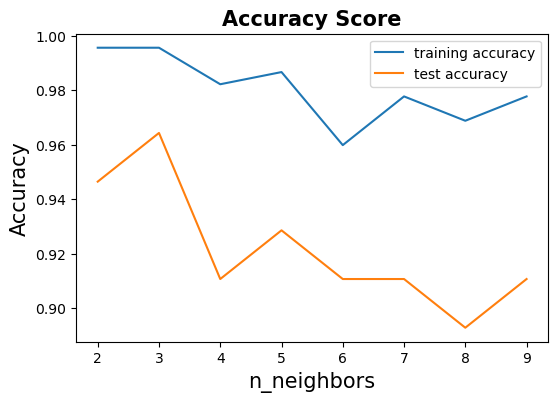

In [67]:
training_accuracy = [] 
test_accuracy = []
training_f1 = []
test_f1 = []

neighbors_settings = range(2,10)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_pca, y_train_pca)
    
    y_train_pred_knn =knn.predict(X_train_pca)
    y_pred_knn =knn.predict(X_test_pca)
    
    training_accuracy.append(accuracy_score(y_train_pca,y_train_pred_knn))
    test_accuracy.append(accuracy_score(y_test_pca, y_pred_knn))

    
fig = plt.figure(figsize=(14,10))

fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('n_neighbors',size=15)
plt.title('Accuracy Score',size=15, weight='bold')
plt.legend()
plt.show()

In [68]:
# n neighbours = 3 seems best
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_pca, y_train_pca)
y_pred_knn = knn.predict(X_test_pca)
print("accuracy of knn", metrics.accuracy_score(y_test_pca, y_pred_knn), "\n")

accuracy of knn 0.9642857142857143 



#### Perceptron

In [71]:
percept = Perceptron(random_state=42).fit(X_train_pca, y_train_pca)
y_pred_percept = percept.predict(X_test_pca)
print("accuracy of single perceptron", metrics.accuracy_score(y_test_pca, y_pred_percept), "\n")

accuracy of single perceptron 1.0 



### Classification models discussion

Various models have presented a perfect accuracy. In particular, those models which have linear behaviour (SVM, Perceptron and Logistic Regression). It is an interesting result: an accuracy of 1.0 would not inspire us enough confidence for turning to production phase. We will thus analyze the linear separability of the dataset.

In [90]:
# PCA for linear separability inquiry
n_components = 3
pca_linear = PCA(n_components = n_components)
pca_linear.fit(dataset_blood_scaled)
dataset_blood_scaled_pca_linear = pd.DataFrame(pca_linear.fit_transform(dataset_blood_scaled), columns = ['PC1', 'PC2', 'PC3'])
dataset_blood_scaled_pca_linear['DEATH_EVENT'] = y
dataset_blood_scaled_pca_linear.head()

,PC1,PC2,PC3,DEATH_EVENT
0,-0.184563,0.416232,1.030226,1.0
1,-0.976758,0.110683,0.372709,1.0
2,-0.141566,0.764763,-0.240307,1.0
3,-0.526939,1.163529,0.526293,1.0
4,-0.150815,0.811918,-0.211740,1.0


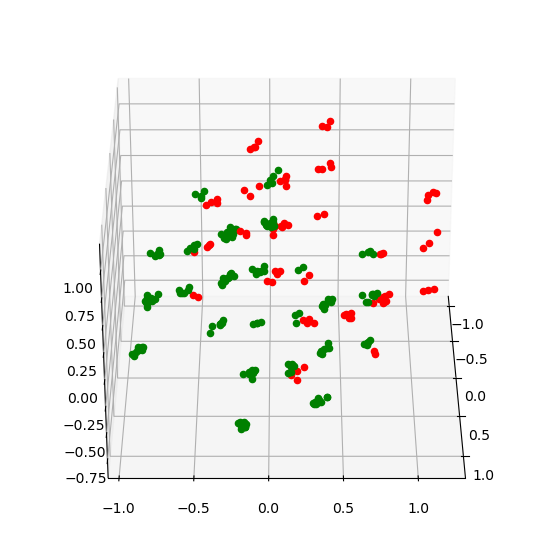

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

0

In [100]:
# Plot 3 dimensions with labels
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for idx, row in dataset_blood_scaled_pca_linear.iterrows():
    if row['DEATH_EVENT']:
        color = 'red'
    else:
        color = 'green'
    ax.scatter(row['PC1'], row['PC2'], row['PC3'], color = color)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
    plt.show()
